In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import json
from pandas.io.json import json_normalize

In [2]:
df = pd.read_csv("ga.csv")

In [3]:
sample = df.iloc[1]['device']

In [4]:
json.loads(sample)

{'browser': 'Chrome',
 'browserVersion': 'not available in demo dataset',
 'browserSize': 'not available in demo dataset',
 'operatingSystem': 'Macintosh',
 'operatingSystemVersion': 'not available in demo dataset',
 'isMobile': False,
 'mobileDeviceBranding': 'not available in demo dataset',
 'mobileDeviceModel': 'not available in demo dataset',
 'mobileInputSelector': 'not available in demo dataset',
 'mobileDeviceInfo': 'not available in demo dataset',
 'mobileDeviceMarketingName': 'not available in demo dataset',
 'flashVersion': 'not available in demo dataset',
 'language': 'not available in demo dataset',
 'screenColors': 'not available in demo dataset',
 'screenResolution': 'not available in demo dataset',
 'deviceCategory': 'desktop'}

In [5]:
df["device"].apply(lambda x: json.loads(x))

0        {'browser': 'Chrome', 'browserVersion': 'not a...
1        {'browser': 'Chrome', 'browserVersion': 'not a...
2        {'browser': 'Chrome', 'browserVersion': 'not a...
3        {'browser': 'Chrome', 'browserVersion': 'not a...
4        {'browser': 'Chrome', 'browserVersion': 'not a...
                               ...                        
11510    {'browser': 'Chrome', 'browserVersion': 'not a...
11511    {'browser': 'Chrome', 'browserVersion': 'not a...
11512    {'browser': 'Chrome', 'browserVersion': 'not a...
11513    {'browser': 'Firefox', 'browserVersion': 'not ...
11514    {'browser': 'Chrome', 'browserVersion': 'not a...
Name: device, Length: 11515, dtype: object

In [6]:
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Direct,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",6.194190e+18,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",6194193421514403509_1472843572,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""11"", ""pageviews"": ""11...","{""campaign"": ""(not set)"", ""source"": ""(direct)""...",1472843572,1,1472843572
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",5.327170e+18,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",5327166854580374902_1472844906,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""11"", ""pageviews"": ""10...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472844906,3,1472844906
2,Referral,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8.885050e+18,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",8885051388942907862_1472827393,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""13"", ""pageviews"": ""11...","{""referralPath"": ""/"", ""campaign"": ""(not set)"",...",1472827393,7,1472827393
3,Referral,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1.854680e+17,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",0185467632009737931_1472846398,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""13"", ""pageviews"": ""12...","{""referralPath"": ""/"", ""campaign"": ""(not set)"",...",1472846398,6,1472846398
4,Referral,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3.244890e+18,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",3244885836845029978_1472824817,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""17"", ""pageviews"": ""14...","{""referralPath"": ""/"", ""campaign"": ""(not set)"",...",1472824817,4,1472824817


In [7]:
json_columns = ['device','geoNetwork','totals','trafficSource']

In [8]:
data = pd.read_csv("ga.csv", converters = {column : json.loads for column in json_columns})

In [9]:
device = json_normalize(data['device'])
geoNetwork = json_normalize(data['geoNetwork'])
totals = json_normalize(data['totals'])
trafficSource = json_normalize(data['trafficSource'])

<ipython-input-9-786960f73172>:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  device = json_normalize(data['device'])
<ipython-input-9-786960f73172>:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  geoNetwork = json_normalize(data['geoNetwork'])
<ipython-input-9-786960f73172>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  totals = json_normalize(data['totals'])
<ipython-input-9-786960f73172>:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  trafficSource = json_normalize(data['trafficSource'])


In [10]:
[i for i in device.columns]

['browser',
 'browserVersion',
 'browserSize',
 'operatingSystem',
 'operatingSystemVersion',
 'isMobile',
 'mobileDeviceBranding',
 'mobileDeviceModel',
 'mobileInputSelector',
 'mobileDeviceInfo',
 'mobileDeviceMarketingName',
 'flashVersion',
 'language',
 'screenColors',
 'screenResolution',
 'deviceCategory']

In [11]:
[f"{'device'}_{i}" for i in device.columns]

['device_browser',
 'device_browserVersion',
 'device_browserSize',
 'device_operatingSystem',
 'device_operatingSystemVersion',
 'device_isMobile',
 'device_mobileDeviceBranding',
 'device_mobileDeviceModel',
 'device_mobileInputSelector',
 'device_mobileDeviceInfo',
 'device_mobileDeviceMarketingName',
 'device_flashVersion',
 'device_language',
 'device_screenColors',
 'device_screenResolution',
 'device_deviceCategory']

In [12]:
device.columns = [f"{'device'}_{i}" for i in device.columns]
geoNetwork.columns = [f"{'geoNetwork'}_{i}" for i in geoNetwork.columns]
totals.columns = [f"{'totals'}_{i}" for i in totals.columns]
trafficSource.columns = [f"{'trafficSource'}_{i}" for i in trafficSource.columns]

In [13]:
data = pd.concat([data,device,geoNetwork,totals,trafficSource],axis=1).drop(json_columns, axis=1)

In [14]:
data

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device_browser,device_browserVersion,...,trafficSource_isTrueDirect,trafficSource_adwordsClickInfo.criteriaParameters,trafficSource_keyword,trafficSource_referralPath,trafficSource_adContent,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_adwordsClickInfo.gclId,trafficSource_adwordsClickInfo.adNetworkType,trafficSource_adwordsClickInfo.isVideoAd
0,Direct,20160902,6.194190e+18,6194193421514403509_1472843572,Not Socially Engaged,1472843572,1,1472843572,Chrome,not available in demo dataset,...,True,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,5.327170e+18,5327166854580374902_1472844906,Not Socially Engaged,1472844906,3,1472844906,Chrome,not available in demo dataset,...,True,not available in demo dataset,(not provided),NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Referral,20160902,8.885050e+18,8885051388942907862_1472827393,Not Socially Engaged,1472827393,7,1472827393,Chrome,not available in demo dataset,...,True,not available in demo dataset,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN
3,Referral,20160902,1.854680e+17,0185467632009737931_1472846398,Not Socially Engaged,1472846398,6,1472846398,Chrome,not available in demo dataset,...,True,not available in demo dataset,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN
4,Referral,20160902,3.244890e+18,3244885836845029978_1472824817,Not Socially Engaged,1472824817,4,1472824817,Chrome,not available in demo dataset,...,True,not available in demo dataset,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11510,Referral,20170104,6.849600e+18,6849604863010168468_1483566314,Not Socially Engaged,1483566314,10,1483566314,Chrome,not available in demo dataset,...,True,not available in demo dataset,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN
11511,Referral,20170104,2.119870e+17,0211986650009953276_1483568879,Not Socially Engaged,1483568879,2,1483568879,Chrome,not available in demo dataset,...,True,not available in demo dataset,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN
11512,Referral,20170104,9.981560e+18,9981562221973608723_1483576938,Not Socially Engaged,1483576938,1,1483576938,Chrome,not available in demo dataset,...,NaN,not available in demo dataset,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN
11513,Direct,20170104,9.631260e+17,963126344221316701_1483552674,Not Socially Engaged,1483552674,3,1483552674,Firefox,not available in demo dataset,...,True,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
pd.set_option('display.max_columns', 100)

In [16]:
data

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device_browser,device_browserVersion,device_browserSize,device_operatingSystem,device_operatingSystemVersion,device_isMobile,device_mobileDeviceBranding,device_mobileDeviceModel,device_mobileInputSelector,device_mobileDeviceInfo,device_mobileDeviceMarketingName,device_flashVersion,device_language,device_screenColors,device_screenResolution,device_deviceCategory,geoNetwork_continent,geoNetwork_subContinent,geoNetwork_country,geoNetwork_region,geoNetwork_metro,geoNetwork_city,geoNetwork_cityId,geoNetwork_networkDomain,geoNetwork_latitude,geoNetwork_longitude,geoNetwork_networkLocation,totals_visits,totals_hits,totals_pageviews,totals_transactionRevenue,totals_newVisits,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_isTrueDirect,trafficSource_adwordsClickInfo.criteriaParameters,trafficSource_keyword,trafficSource_referralPath,trafficSource_adContent,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_adwordsClickInfo.gclId,trafficSource_adwordsClickInfo.adNetworkType,trafficSource_adwordsClickInfo.isVideoAd
0,Direct,20160902,6.194190e+18,6194193421514403509_1472843572,Not Socially Engaged,1472843572,1,1472843572,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,Michigan,Detroit MI,Ann Arbor,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,11,11,37860000,1,(not set),(direct),(none),True,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,5.327170e+18,5327166854580374902_1472844906,Not Socially Engaged,1472844906,3,1472844906,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,New York,New York NY,New York,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,11,10,306670000,NaN,(not set),google,organic,True,not available in demo dataset,(not provided),NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Referral,20160902,8.885050e+18,8885051388942907862_1472827393,Not Socially Engaged,1472827393,7,1472827393,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,New York,New York NY,New York,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,13,11,68030000,NaN,(not set),mall.googleplex.com,referral,True,not available in demo dataset,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN
3,Referral,20160902,1.854680e+17,0185467632009737931_1472846398,Not Socially Engaged,1472846398,6,1472846398,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available 

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11515 entries, 0 to 11514
Data columns (total 53 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   channelGrouping                                    11515 non-null  object 
 1   date                                               11515 non-null  int64  
 2   fullVisitorId                                      11515 non-null  float64
 3   sessionId                                          11515 non-null  object 
 4   socialEngagementType                               11515 non-null  object 
 5   visitId                                            11515 non-null  int64  
 6   visitNumber                                        11515 non-null  int64  
 7   visitStartTime                                     11515 non-null  int64  
 8   device_browser                                     11515 non-null  object 
 9   device

In [20]:
totals =['totals_visits', 'totals_hits', 'totals_pageviews', 'totals_transactionRevenue', 'totals_newVisits']

In [22]:
for i in totals:
    data[i] = pd.to_numeric(data[i])

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11515 entries, 0 to 11514
Data columns (total 53 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   channelGrouping                                    11515 non-null  object 
 1   date                                               11515 non-null  int64  
 2   fullVisitorId                                      11515 non-null  float64
 3   sessionId                                          11515 non-null  object 
 4   socialEngagementType                               11515 non-null  object 
 5   visitId                                            11515 non-null  int64  
 6   visitNumber                                        11515 non-null  int64  
 7   visitStartTime                                     11515 non-null  int64  
 8   device_browser                                     11515 non-null  object 
 9   device

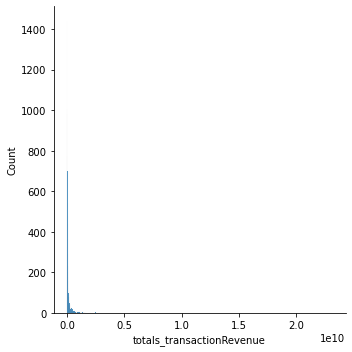

In [24]:
sns.displot(data['totals_transactionRevenue'])

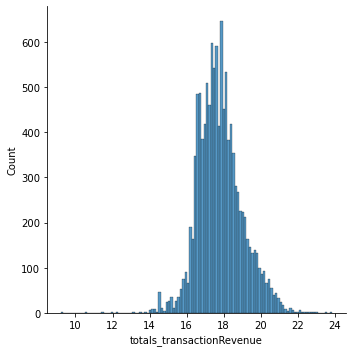

In [26]:
sns.displot(np.log(data['totals_transactionRevenue']))

In [27]:
data['totals_transactionRevenue'] = np.log(data['totals_transactionRevenue'])

In [29]:
drop_list = ['fullVisitorId','sessionId','visitId','visitStartTime']

In [30]:
data.drop(drop_list, axis=1, inplace= True)

In [37]:
na_list = data.isna().mean() [data.isna().mean() >0.9].index

In [38]:
data.drop(na_list, axis=1, inplace=True)

In [41]:
data.isna().mean()[data.isna().mean()>0]

totals_newVisits              0.612245
trafficSource_isTrueDirect    0.391750
trafficSource_keyword         0.663830
trafficSource_referralPath    0.529744
dtype: float64

In [42]:
data['totals_newVisits'].value_counts()

1.0    4465
Name: totals_newVisits, dtype: int64

In [43]:
data.drop('totals_newVisits',axis=1,inplace=True)

In [44]:
data['trafficSource_isTrueDirect'].value_counts()

True    7004
Name: trafficSource_isTrueDirect, dtype: int64

In [45]:
data.drop('trafficSource_isTrueDirect',axis=1,inplace=True)

In [46]:
data['trafficSource_keyword'].value_counts()

(not provided)                             3387
6qEhsCssdK0z36ri                            261
google merchandise store                     59
1hZbAqLCbjwfgOH7                             56
Google Merchandise                           45
(Remarketing/Content targeting)               9
+Google +Merchandise                          7
1X4Me6ZKNV0zg-jV                              6
+Google +Swag                                 3
+Google +Gear                                 3
google store                                  3
category_l1==166                              2
youtube merch                                 2
google apparel store                          2
GOOGLE MERCHANDISE                            2
+google +store                                2
google store merchandise                      2
+google +merchandise +store                   2
google stickers                               2
+google +stores                               1
(automatic matching)                    

In [48]:
data['trafficSource_keyword'] = data['trafficSource_keyword'].fillna('unknown')

In [49]:
data['trafficSource_referralPath'].value_counts()

/                                                                                                                                                                                  5151
/mail/u/0/                                                                                                                                                                           55
/a/google.com/forum/                                                                                                                                                                 35
/google-merchandise-store                                                                                                                                                            22
/offer/2145                                                                                                                                                                          18
/deal/-ds-sign-up-for-google-merchandise-store-emails-for-special-coup-c179     

In [50]:
data.drop('trafficSource_referralPath',axis=1,inplace=True)

In [51]:
data

,channelGrouping,date,socialEngagementType,visitNumber,device_browser,device_browserVersion,device_browserSize,device_operatingSystem,device_operatingSystemVersion,device_isMobile,device_mobileDeviceBranding,device_mobileDeviceModel,device_mobileInputSelector,device_mobileDeviceInfo,device_mobileDeviceMarketingName,device_flashVersion,device_language,device_screenColors,device_screenResolution,device_deviceCategory,geoNetwork_continent,geoNetwork_subContinent,geoNetwork_country,geoNetwork_region,geoNetwork_metro,geoNetwork_city,geoNetwork_cityId,geoNetwork_networkDomain,geoNetwork_latitude,geoNetwork_longitude,geoNetwork_networkLocation,totals_visits,totals_hits,totals_pageviews,totals_transactionRevenue,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_adwordsClickInfo.criteriaParameters,trafficSource_keyword
0,Direct,20160902,Not Socially Engaged,1,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,Michigan,Detroit MI,Ann Arbor,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,11,11,17.449406,(not set),(direct),(none),not available in demo dataset,unknown
1,Organic Search,20160902,Not Socially Engaged,3,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,New York,New York NY,New York,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,11,10,19.541283,(not set),google,organic,not available in demo dataset,(not provided)
2,Referral,20160902,Not Socially Engaged,7,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,New York,New York NY,New York,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,13,11,18.035459,(not set),mall.googleplex.com,referral,not available in demo dataset,unknown
3,Referral,20160902,Not Socially Engaged,6,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,California,San Francisco-Oakland-San Jose CA,Mountain View,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,13,12,17.083177,(not set),mall.googleplex.com,referral,not available in demo dataset,unknown
4,Referral,20160902,Not Socially Engaged,4,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available 

In [54]:
data.isna().mean()

channelGrouping                                      0.0
date                                                 0.0
socialEngagementType                                 0.0
visitNumber                                          0.0
device_browser                                       0.0
device_browserVersion                                0.0
device_browserSize                                   0.0
device_operatingSystem                               0.0
device_operatingSystemVersion                        0.0
device_isMobile                                      0.0
device_mobileDeviceBranding                          0.0
device_mobileDeviceModel                             0.0
device_mobileInputSelector                           0.0
device_mobileDeviceInfo                              0.0
device_mobileDeviceMarketingName                     0.0
device_flashVersion                                  0.0
device_language                                      0.0
device_screenColors            

In [60]:
for i in data.columns:
    if data[i].dtype =='O':
        print(i,data[i].nunique())

channelGrouping 8
socialEngagementType 1
device_browser 9
device_browserVersion 1
device_browserSize 1
device_operatingSystem 7
device_operatingSystemVersion 1
device_mobileDeviceBranding 1
device_mobileDeviceModel 1
device_mobileInputSelector 1
device_mobileDeviceInfo 1
device_mobileDeviceMarketingName 1
device_flashVersion 1
device_language 1
device_screenColors 1
device_screenResolution 1
device_deviceCategory 3
geoNetwork_continent 6
geoNetwork_subContinent 19
geoNetwork_country 69
geoNetwork_region 79
geoNetwork_metro 46
geoNetwork_city 134
geoNetwork_cityId 1
geoNetwork_networkDomain 732
geoNetwork_latitude 1
geoNetwork_longitude 1
geoNetwork_networkLocation 1
trafficSource_campaign 7
trafficSource_source 44
trafficSource_medium 7
trafficSource_adwordsClickInfo.criteriaParameters 1
trafficSource_keyword 36


In [61]:
count = pd.DataFrame(columns=['count'])

for i in data.columns:
    if data[i].dtype =='O':
        count.loc[i] = data[i].nunique()

In [66]:
value_one = count[count['count']==1].index

In [67]:
data.drop(value_one,axis=1 ,inplace=True)

In [71]:
value_large = count[count['count'] >70].index

In [72]:
data.drop(value_large, axis=1, inplace=True)

In [73]:
data

,channelGrouping,date,visitNumber,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,geoNetwork_continent,geoNetwork_subContinent,geoNetwork_country,geoNetwork_metro,totals_visits,totals_hits,totals_pageviews,totals_transactionRevenue,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_keyword
0,Direct,20160902,1,Chrome,Linux,False,desktop,Americas,Northern America,United States,Detroit MI,1,11,11,17.449406,(not set),(direct),(none),unknown
1,Organic Search,20160902,3,Chrome,Macintosh,False,desktop,Americas,Northern America,United States,New York NY,1,11,10,19.541283,(not set),google,organic,(not provided)
2,Referral,20160902,7,Chrome,Linux,False,desktop,Americas,Northern America,United States,New York NY,1,13,11,18.035459,(not set),mall.googleplex.com,referral,unknown
3,Referral,20160902,6,Chrome,Windows,False,desktop,Americas,Northern America,United States,San Francisco-Oakland-San Jose CA,1,13,12,17.083177,(not set),mall.googleplex.com,referral,unknown
4,Referral,20160902,4,Chrome,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,1,17,14,20.168401,(not set),mall.googleplex.com,referral,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11510,Referral,20170104,10,Chrome,Macintosh,False,desktop,Americas,Northern America,United States,New York NY,1,61,48,19.630417,(not set),mall.googleplex.com,referral,unknown
11511,Referral,20170104,2,Chrome,Macintosh,False,desktop,Americas,Northern America,United States,Austin TX,1,66,30,20.212357,(not set),mall.googleplex.com,referral,unknown
11512,Referral,20170104,1,Chrome,Macintosh,False,desktop,Asia,Eastern Asia,South Korea,(not set),1,122,90,17.241401,(not set),mall.googleplex.com,referral,unknown
11513,Direct,20170104,3,Firefox,Macintosh,False,desktop,Americas,Northern America,United States,New York NY,1,130,90,18.055253,(not set),(direct),(none),unknown


In [74]:
obj_list = []
for i in data.columns:
    if data[i].dtype =='O':
        obj_list.append(i)

In [75]:
obj_list

['channelGrouping',
 'device_browser',
 'device_operatingSystem',
 'device_deviceCategory',
 'geoNetwork_continent',
 'geoNetwork_subContinent',
 'geoNetwork_country',
 'geoNetwork_metro',
 'trafficSource_campaign',
 'trafficSource_source',
 'trafficSource_medium',
 'trafficSource_keyword']

In [77]:
data = pd.get_dummies(data,columns=obj_list, drop_first=True)

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X = data.drop('totals_transactionRevenue',axis=1)
y = data['totals_transactionRevenue']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

In [81]:
from sklearn.ensemble import RandomForestRegressor

In [82]:
model = RandomForestRegressor(max_depth=10, n_estimators=1000).fit(X_train, y_train)

In [83]:
pred = model.predict(X_test)

In [84]:
from sklearn.metrics import mean_squared_error

In [85]:
mean_squared_error(y_test, pred) **0.5

1.052466703047467

C:\Users\wjddn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='totals_transactionRevenue'>

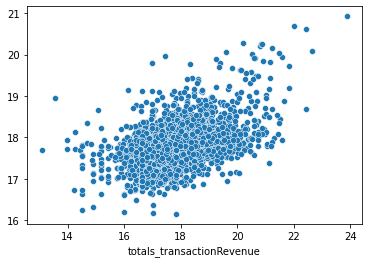

In [86]:
sns.scatterplot(y_test, pred)